In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/carrental%202019.csv')
data

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,...,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,status,confirm_at,complete_at,cancel_at
0,12/31/2019 19:34,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,...,0.0,0.0,0.0,42693.0,0,0.0,complete,12/31/2019 20:46,1/7/2020 22:44,NaN
1,12/31/2019 14:02,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,...,0.0,300.0,0.0,1999.2,5000,98.0,complete,48:18.7,15:30.3,NaN
2,12/31/2019 9:37,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,...,0.0,0.0,0.0,1048.6,5000,0.0,complete,48:50.6,48:31.4,NaN
3,12/30/2019 23:05,DM6010-26093,ios,credit,6010:Toyota Yaris,local,Toyota,Yaris,car,1.0,...,0.0,0.0,0.0,1358.9,0,0.0,complete,06:24.2,28:00.5,NaN
4,12/30/2019 20:28,DM1907-26090,web,credit,1907:Toyota Vios,private,Toyota,Vios,car,2.0,...,0.0,300.0,0.0,2203.2,0,108.0,complete,38:36.1,15:30.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,1/4/2019 16:01,DM2551-11316,web,credit,2551:Mitsubishi Attrage,private,Mitsubishi,Attrage,car,2.0,...,0.0,0.0,0.0,1990.2,10000,0.0,complete,1/4/2019 16:01,NaN,NaN
3200,1/4/2019 15:54,DM2551-11314,web,credit,2551:Mitsubishi Attrage,private,Mitsubishi,Attrage,car,3.0,...,0.0,0.0,0.0,2985.3,10000,0.0,complete,1/4/2019 15:54,NaN,NaN
3201,1/4/2019 8:31,DM3984-11303,web,transfer,3984:Toyota Vios,local,Toyota,Vios,car,2.0,...,0.0,0.0,0.0,2889.0,5000,0.0,complete,1/4/2019 8:31,NaN,NaN
3202,1/2/2019 16:06,DM3477-11297,ios,credit,3477:Mini Cooper Hatch 3 door,private,Mini,Cooper Hatch 3 door,car,1.0,...,0.0,0.0,0.0,6077.6,20000,0.0,complete,1/2/2019 16:06,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   created_at               3204 non-null   object 
 1   order_id                 3204 non-null   object 
 2   rent_channel             3204 non-null   object 
 3   payment_method           3201 non-null   object 
 4   car                      3121 non-null   object 
 5   car__owner__user_status  3121 non-null   object 
 6   car__brand               3121 non-null   object 
 7   car__model               3121 non-null   object 
 8   rental_category          3195 non-null   object 
 9   total_period             3204 non-null   float64
 10  price_per_day            3204 non-null   float64
 11  total_price              3204 non-null   float64
 12  insurance_price          3203 non-null   float64
 13  insurance_amount         3204 non-null   int64  
 14  vat_amount              

In [4]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [5]:
data['month'] = data['created_at'].dt.month_name('eng')

In [6]:
data = data.sort_values(by='created_at')
data = data.reset_index(drop=True)

In [7]:
data = data.drop(columns=['confirm_at', 'complete_at', 'cancel_at'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   created_at               3204 non-null   datetime64[ns]
 1   order_id                 3204 non-null   object        
 2   rent_channel             3204 non-null   object        
 3   payment_method           3201 non-null   object        
 4   car                      3121 non-null   object        
 5   car__owner__user_status  3121 non-null   object        
 6   car__brand               3121 non-null   object        
 7   car__model               3121 non-null   object        
 8   rental_category          3195 non-null   object        
 9   total_period             3204 non-null   float64       
 10  price_per_day            3204 non-null   float64       
 11  total_price              3204 non-null   float64       
 12  insurance_price          3203 non-

In [9]:
data.describe()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding
count,3204.000000,3204.000000,3204.000000,3203.000000,3204.000000,3204.000000,3204.000000,3203.000000,3204.000000,3203.000000,3204.000000,3204.000000,3203.000000
mean,3.431336,1597.692016,4538.984366,151.849741,411.404182,333.673358,1076.237452,92.834858,86.087828,3.933812,5082.296974,3971.598939,30.775946
std,5.990337,5710.345390,10935.219654,215.835668,851.681707,764.530903,4060.185364,829.128406,473.727057,41.257687,11630.301453,4908.988156,184.318606
min,1.000000,350.000000,390.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,800.000000,1200.000000,0.000000,0.000000,89.600000,225.000000,0.000000,0.000000,0.000000,1369.600000,0.000000,0.000000
50%,2.000000,1000.000000,2400.000000,0.000000,0.000000,176.400000,525.000000,0.000000,0.000000,0.000000,2675.000000,5000.000000,0.000000
75%,3.000000,1500.000000,4447.500000,280.000000,560.000000,333.900000,1000.000000,0.000000,0.000000,0.000000,5093.200000,5000.000000,0.000000
max,90.000000,300000.000000,300000.000000,710.000000,14880.000000,21000.000000,180000.000000,25000.000000,12240.000000,600.000000,321000.000000,50000.000000,4250.000000


In [10]:
data['status'].value_counts()

complete    2899
cancel       252
success       51
failed         2
Name: status, dtype: int64

In [11]:
old_values = ['complete', 'success', 'cancel', 'failed']
new_values = [1, 1, 0, 0]

data['status'] = data['status'].replace(old_values, new_values)
data['status'].value_counts()

1    2950
0     254
Name: status, dtype: int64

In [12]:
data.groupby('status').mean()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding
status,,,,,,,,,,,,,
0,2.663386,3072.720945,5217.038583,128.640276,308.421260,373.181772,1108.574874,69.784843,89.421260,0.787402,5668.973128,5059.055118,41.77451
1,3.497458,1470.689526,4480.602749,153.848793,420.271186,330.271616,1073.453145,94.820176,85.800814,4.204815,5031.783163,3877.967119,29.82863


In [13]:
df = data
num_columns = df.describe().columns.drop(['status'])
obj_columns = df.columns[df.dtypes=='object']
factor = 3
for col in num_columns:
    upper = data[col].mean() + data[col].std()*factor
    lower = data[col].mean() - data[col].std()*factor
    df = df[df[col] <= upper]
    df = df[df[col] >= lower]
df.describe()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,status
count,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000
mean,2.237370,1275.639721,2797.361351,140.781082,322.167682,214.185187,620.689255,17.052060,43.908008,0.214977,3260.494670,2981.011465,16.494896,0.919025
std,1.660364,1052.605494,2643.836176,201.400738,547.672555,198.602781,635.663148,139.506243,198.053918,4.632402,3023.404376,2861.686451,63.313312,0.272845
min,1.000000,390.000000,390.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,212.930000,0.000000,0.000000,0.000000
25%,1.000000,800.000000,1065.000000,0.000000,0.000000,84.000000,186.915000,0.000000,0.000000,0.000000,1284.000000,0.000000,0.000000,1.000000
50%,2.000000,1000.000000,2000.000000,0.000000,0.000000,161.000000,450.000000,0.000000,0.000000,0.000000,2439.600000,5000.000000,0.000000,1.000000
75%,3.000000,1350.000000,3580.000000,280.000000,560.000000,264.075000,779.700000,0.000000,0.000000,0.000000,4012.500000,5000.000000,0.000000,1.000000
max,20.000000,16000.000000,24000.000000,710.000000,2900.000000,1878.800000,6000.000000,2500.000000,1500.000000,100.000000,28718.800000,10000.000000,550.000000,1.000000


In [14]:
print('Original shape =', data.shape)
print('Modified shape =', df.shape)

Original shape = (3204, 24)
Modified shape = (2791, 24)


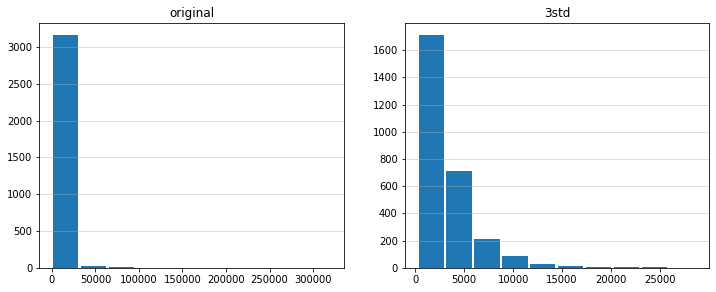

In [15]:
fig, axs = plt.subplots(1,2, figsize=(12, 4.5))
x = 'total_amount'
axs[0].hist(data[x], rwidth=0.9)
axs[1].hist(df[x], rwidth=0.9)
axs[0].grid(axis='y', alpha=0.5)
axs[1].grid(axis='y', alpha=0.5)
axs[0].set_title('original')
axs[1].set_title('3std')
plt.show()

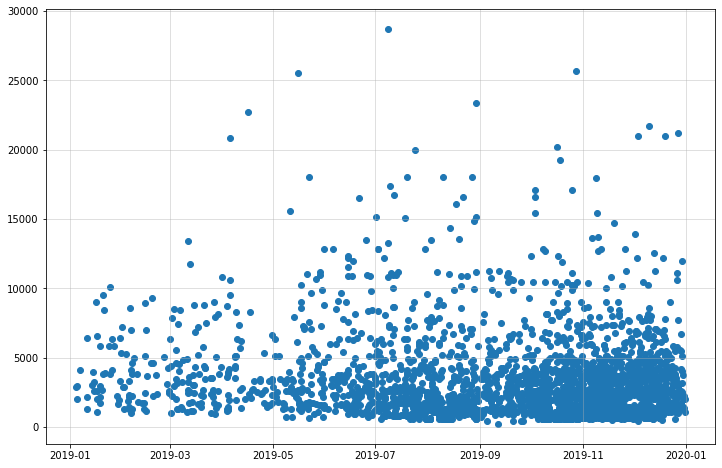

In [16]:
x = df['created_at']
y = df['total_amount']
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.grid(alpha=0.5)
plt.show()

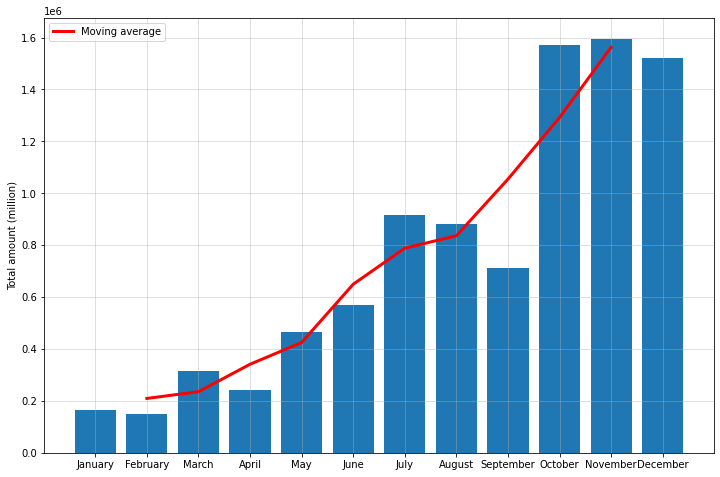

In [17]:
dat = df.groupby('month', sort=False).sum()['total_amount']
ma = dat.rolling(window = 3, center=True).mean()

plt.figure(figsize=(12,8))
plt.bar(dat.index, dat.values)
plt.plot(ma, c='r', linewidth=3, label='Moving average')
plt.ylabel('Total amount (million)')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

X = np.arange(1, 13).reshape(-1,1)
y = dat.values

linear = LinearRegression().fit(X, y)

print(linear.score(X, y))

X_fit = np.arange(1, 16).reshape(-1,1)
y_linear = linear.predict(X_fit)

0.8782249211461071


In [19]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2, include_bias=False)

X_ = transformer.fit_transform(X)

poly = LinearRegression().fit(X_, y)

print(poly.score(X_, y))

X_fit_ = transformer.fit_transform(X_fit)
y_poly = poly.predict(X_fit_)

0.9025380690040994


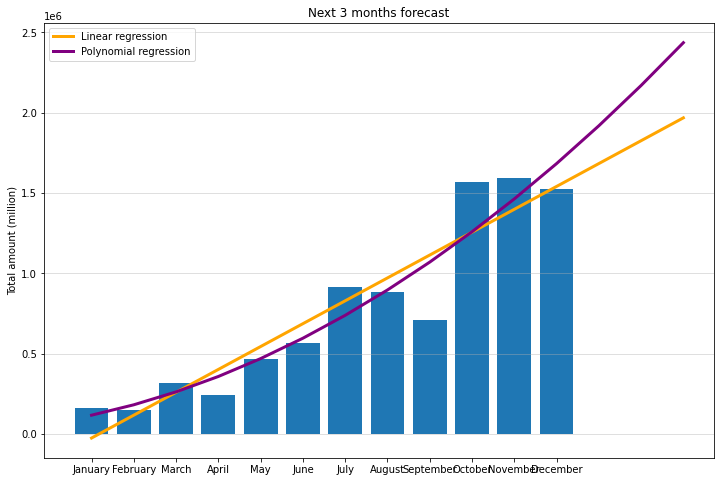

In [20]:
plt.figure(figsize=(12,8))
plt.bar(dat.index, dat.values)
plt.plot(y_linear, c='orange', linewidth=3, label='Linear regression')
plt.plot(y_poly, c='purple', linewidth=3, label='Polynomial regression')
plt.ylabel('Total amount (million)')
plt.grid(axis='y', alpha=0.5)
plt.title('Next 3 months forecast')
plt.legend()
plt.show()

In [21]:
df_log = df[num_columns].applymap(lambda x: np.log(x+1))
cols = [*obj_columns, 'status', 'created_at']
df_log = df_log.join(df[cols])
df_log.describe()

,total_period,price_per_day,total_price,insurance_price,insurance_amount,vat_amount,commission,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,status
count,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000
mean,1.081799,7.001027,7.610624,2.170763,2.406840,5.042605,6.011367,0.129902,0.408707,0.009921,7.761108,4.738874,0.451263,0.919025
std,0.406100,0.483387,0.794173,2.850098,3.194946,0.815352,0.954750,0.920272,1.562102,0.213791,0.808496,4.264878,1.448822,0.272845
min,0.693147,5.968708,5.968708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.365649,0.000000,0.000000,0.000000
25%,0.693147,6.685861,6.971570,0.000000,0.000000,4.442651,5.235990,0.000000,0.000000,0.000000,7.158514,0.000000,0.000000,1.000000
50%,1.098612,6.908755,7.601402,0.000000,0.000000,5.087596,6.111467,0.000000,0.000000,0.000000,7.799999,8.517393,0.000000,1.000000
75%,1.386294,7.208600,8.183397,5.638355,6.329721,5.580011,6.660191,0.000000,0.000000,0.000000,8.297419,8.517393,0.000000,1.000000
max,3.044522,9.680406,10.085851,6.566672,7.972811,7.538921,8.699681,7.824446,7.313887,4.615121,10.265342,9.210440,6.311735,1.000000


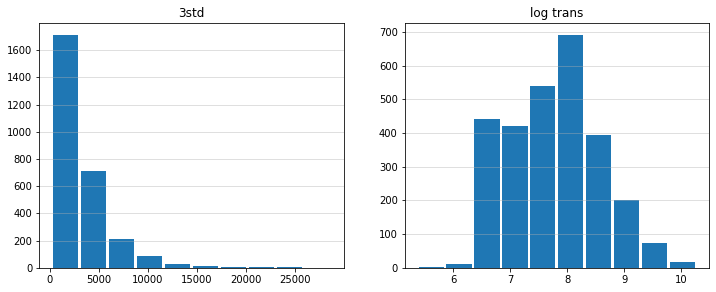

In [22]:
fig, axs = plt.subplots(1,2, figsize=(12, 4.5))
x = 'total_amount'
axs[0].hist(df[x], rwidth=0.9)
axs[1].hist(df_log[x], rwidth=0.9)
axs[0].grid(axis='y', alpha=0.5)
axs[1].grid(axis='y', alpha=0.5)
axs[0].set_title('3std')
axs[1].set_title('log trans')
plt.show()

In [23]:
#df_ohe = df
df_ohe = df_log
for col in obj_columns.drop(['order_id', 'car']):
    cat_list = 'col'+'_'+col
    cat_list = pd.get_dummies(df_ohe[col], prefix=col)
    df_ohe = df_ohe.join(cat_list)
df_ohe = df_ohe.drop(columns=[*obj_columns, 'created_at'])
df_ohe.columns

Index(['total_period', 'price_per_day', 'total_price', 'insurance_price',
       'insurance_amount', 'vat_amount', 'commission', 'discount_amount',
       'promotion_amount', 'redeem_amount',
       ...
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September'],
      dtype='object', length=127)

In [24]:
pd.pivot_table(df, values='order_id', index=['status'], columns=['month'], aggfunc='count', sort=False)

month,April,August,December,February,January,July,June,March,May,November,October,September
status,,,,,,,,,,,,
1,55.0,252.0,412.0,40.0,39.0,248.0,144.0,78.0,108.0,544.0,474.0,171.0
0,NaN,13.0,48.0,1.0,NaN,1.0,1.0,NaN,1.0,53.0,66.0,42.0


1    2565
0     226
Name: status, dtype: int64


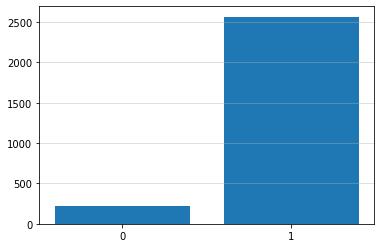

In [25]:
print(df['status'].value_counts())
plt.bar(df['status'].unique(), df['status'].value_counts())
plt.xticks(df['status'].unique().astype(int))
plt.grid(axis='y', alpha=0.5)
plt.show()

In [26]:
X = df_ohe.drop(columns=['status'])
y = df_ohe['status']

In [27]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_os, y_os = os.fit_resample(X, y)
X_os = pd.DataFrame(data=X_os, columns=X.columns )
y_os = pd.DataFrame(data=y_os, columns=['status'])

1    2565
0    2565
Name: status, dtype: int64


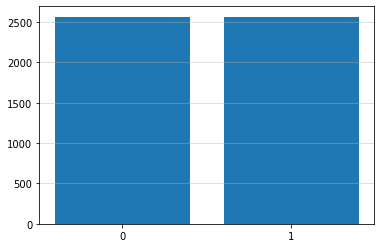

In [28]:
print(y_os['status'].value_counts())
plt.bar(y_os['status'].unique(), y_os['status'].value_counts())
plt.xticks(y_os['status'].unique().astype(int))
plt.grid(axis='y', alpha=0.5)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.25, random_state=0)

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [31]:
from sklearn.linear_model import LogisticRegression
logis_reg = LogisticRegression()

logis_reg.fit(X_train, y_train.values.ravel())

y_pred = logis_reg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[590  62]
 [ 55 576]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       652
           1       0.90      0.91      0.91       631

    accuracy                           0.91      1283
   macro avg       0.91      0.91      0.91      1283
weighted avg       0.91      0.91      0.91      1283



C:\Users\Jame\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logis_reg, n_features_to_select=100)
rfe = rfe.fit(X_os, y_os.values.ravel())
rfe.support_

C:\Users\Jame\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jame\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True, False,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [33]:
select =[]
for i in range(len(rfe.support_)):
    if rfe.support_[i]==True:
        select.append(X_os.columns[i])

In [34]:
logis_reg_new = LogisticRegression()

logis_reg_new.fit(X_train[select], y_train.values.ravel())

y_pred = logis_reg_new.predict(X_test[select])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[591  61]
 [ 47 584]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       652
           1       0.91      0.93      0.92       631

    accuracy                           0.92      1283
   macro avg       0.92      0.92      0.92      1283
weighted avg       0.92      0.92      0.92      1283



C:\Users\Jame\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


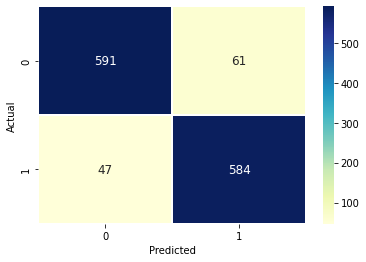

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred), linewidths=2, linecolor='w', cmap='YlGnBu',
            annot=True, fmt='.0f', annot_kws={"fontsize":12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
from sklearn.naive_bayes import GaussianNB
naive_bay = GaussianNB()

naive_bay.fit(X_train[select], y_train.values.ravel())

y_pred = naive_bay.predict(X_test[select])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[641  11]
 [366 265]]
              precision    recall  f1-score   support

           0       0.64      0.98      0.77       652
           1       0.96      0.42      0.58       631

    accuracy                           0.71      1283
   macro avg       0.80      0.70      0.68      1283
weighted avg       0.80      0.71      0.68      1283



In [37]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
#svm = SVC(kernel='poly')
#svm = SVC(kernel='rbf')

svm.fit(X_train[select], y_train.values.ravel())

y_pred = svm.predict(X_test[select])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[595  57]
 [ 64 567]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       652
           1       0.91      0.90      0.90       631

    accuracy                           0.91      1283
   macro avg       0.91      0.91      0.91      1283
weighted avg       0.91      0.91      0.91      1283

